<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.4 Modelos en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios</h3>

### Ejercicio 1

Simular el proceso de incremento de un capital inicial $x_0$ sometido a un tipo de interés en los siguientes supuestos:

**a)** Suponer un tipo de interés simple y anual $i_a$, esto es, el interés se aplica una vez y se acumula al capital al final de cada año. Escribir la ecuación en diferencias que modela el proceso de acumulación de capital y resolverla analíticamente y por medio de simulaciones.

**b)** Suponer ahora que se aplica un tipo de interés diario $i_d$ al capital. Encontrar el tipo de interés diario con el cual se obtiene el mismo interés en un año que aplicando el tipo de interés anual anterior. Hallar la relación entre ambos tipos de interés (anual y diario) analítica y numéricamente.

**c)** Suponer que se toma el tiempo de forma continua, donde cada unidad de tiempo es un año. Encontrar la relación entre el tipo de interés anual simple $i_a$ (discreto) y compuesto $i_c$ (tiempo continuo), tanto analítica como numéricamente. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x0 = 1e2
i_a = 0.03

In [5]:
def solve_discrete(model, x0, l):
    x = np.zeros((l, len(x0)))
    x[0] = x0
    for t in range(l-1):
        x[t+1] = x[t] + model(x[t], t)
    return x

In [6]:
def interest_yearly(i_a):
    def f(x, t):
        return np.array([x*i_a])
    return f

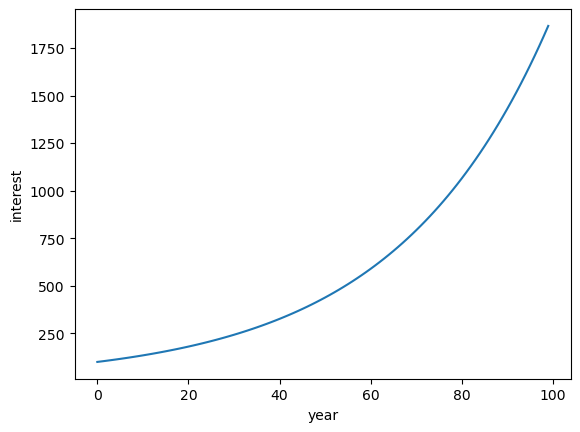

In [7]:
x = solve_discrete(interest_yearly(i_a), np.array([x0]), 100)

plt.plot(x)
plt.xlabel("year")
plt.ylabel("interest")
plt.show()

In [8]:
def interest_daily(i_d):
    def f(x, t):
        return np.array([x * ((1+i_d)**365 - 1)])
    return f

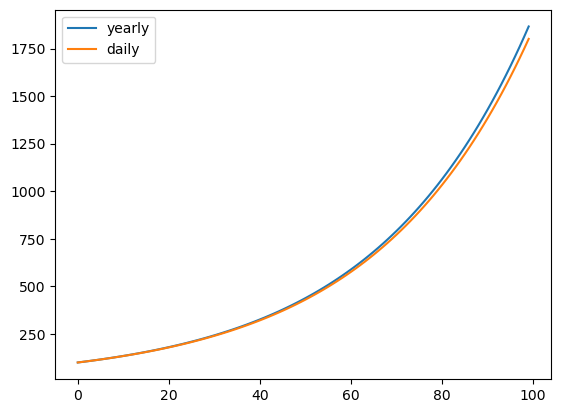

In [9]:
i_d = 8e-5
x_a = solve_discrete(interest_yearly(i_a), [x0], 100)
x_d = solve_discrete(interest_daily(i_d), [x0], 100)

plt.plot(x_a, label="yearly")
plt.plot(x_d, label="daily")
plt.legend()
plt.show()

In [10]:
from scipy.optimize import leastsq

i_a = 0.03
def err_func(params):
    i_d = params[0]

    x_a = solve_discrete(interest_yearly(i_a), [x0], 100)
    x_d = solve_discrete(interest_daily(i_d), [x0], 100)

    return (x_a - x_d).flatten()

i_d_hat, _ = leastsq(err_func, np.array([1e-4]),)
i_d_hat

array([8.09862991e-05])

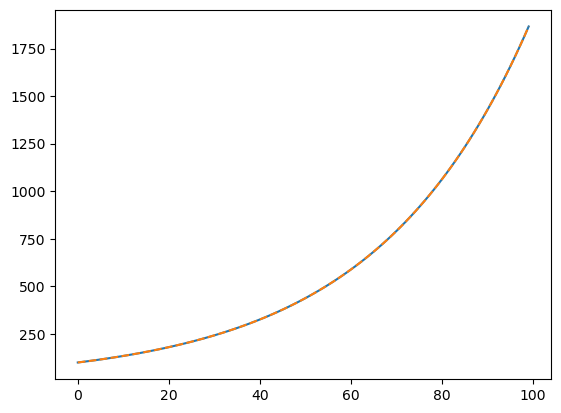

In [11]:
x1 = solve_discrete(interest_yearly(i_a), [x0], 100)
x2 = solve_discrete(interest_daily(i_d_hat[0]), [x0], 100)

plt.plot(x1)
plt.plot(x2, '--')
plt.show()

In [12]:
i_d = (1+i_a)**(1/365)-1
i_d

8.098629905317623e-05

In [13]:
def solve_rk(model, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = model(x[i], t[i])
        k2 = model(x[i]+dt*k1/2, t[i]+dt/2)
        k3 = model(x[i]+dt*k2/2, t[i]+dt/2)
        k4 = model(x[i]+dt*k3, t[i]+dt)
        x[i+1] = x[i] + dt/6 * (k1+2*k2+2*k3+k4) 
    return x

In [14]:
def interest_cont(i_c):
    def f(x, t):
        return x*i_c
    return f

In [15]:
t = np.linspace(0, 20, 100001)
i_a = 0.03

x_disc = solve_discrete(interest_yearly(i_a), x0, 20)
x_cont = solve_rk(interest_cont(i_a), [x0], t)

plt.plot(x_disc, label="discrete")
plt.plot(t, x_cont, label="continuous")

TypeError: object of type 'float' has no len()

In [ ]:
def err_func(param):
    t = np.linspace(0, 10, 1001)
    x_disc = solve_discrete(interest_yearly(i_a), x0, 10)
    x_cont = solve_rk(interest_cont(param), [x0], t)[:,0]

    x_cont_adj = np.interp(np.linspace(0, 9, 10), t, x_cont)

    return x_disc - x_cont_adj



In [ ]:
leastsq(err_func, i_a)

(array([0.0295588]), 2)

In [ ]:
np.log(1+i_a)

np.float64(0.02955880224154443)

### Ejercicio 2

Este ejercicio presenta un modelo económico clásico en tiempo discreto, llamado **modelo de la telaraña**. Se asume un mercado de un cierto producto (e.g., productos agrícolas, como soja, arroz, café,...), cuyos precios se fijan periodo a periodo (años) por la ley de la oferta y demanda. Las suposiciones son las siguientes: 

- Supóngase $D(p_t)$ el producto demandado en el año $t$, que depende del precio $p_t$ del producto en ese año. Se asume una demanda lineal, por tanto, $D(p_t) = a -bp_t$, donde $a$ y $b$ son parámetros.
- Los productores toman decisiones de producción a partir de los precios de años anteriores. Por simplicidad, se asume que la oferta de ese producto en el año $t$ depende exclusivamente del precio del producto en el año anterior. Por tanto $S=S(p_{t-1})$.
- Se asume un mercado en competencia perfecta, por lo que el precio del producto en cada año se obtiene como resultado de igualarse las funciones de oferta y demanda, esto es $D(p_t)=S(p_{t-1})$. Despejando $p_t$ de esta ecuación se llega a:
  $$ p_t= \frac{a}{b} - \frac{S(p_{t-1})}{b}. $$

**a)** Asumir una función de oferta lineal creciente y estudiar la evolución de los precios del producto a largo plazo en función de los valores de los parámetros y un precio inicial del producto $p_0$. 

**b)** Supóngase ahora que la oferta anual se fija a partir de un precio esperado $p_t^e$. Las expectativas de precios se fijan a partir del precio y las expectativas de precios del año anterior de la forma:
  $$ p_t^e= (1-\alpha) p_{t-1} + \alpha p_{t-1}^e, $$
con $0 \leq \alpha \leq 1$ un parámetro que determina el peso de las expectivas de precios del año anterior en la expectivas de precios del año en curso. Realizar el mismo estudio del epígrafe anterior para esta nueva forma de fijación de la oferta, asumiendo el mismo precio inicial $p_0$ anterior y $p_1$ el dado por el epígrafe anterior. 


In [ ]:
a = 8
b = 1
c = 2
d = 1
p0 = [2]

In [ ]:
def supply(c, d, p):
    return c+d*p

def web_model(a,b,c,d):
    def f(x, t):
        pt = (a-c)/b - d*x[0]/b - x[0]
        return np.array([pt])
    return f


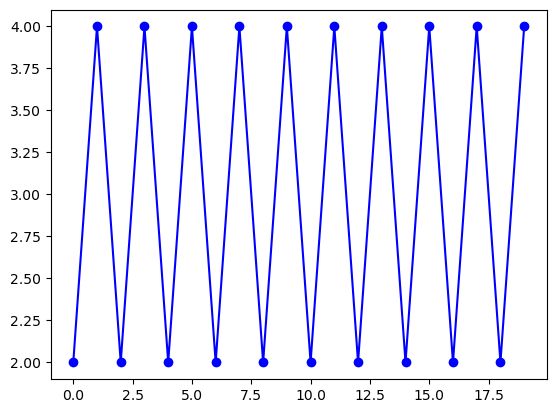

In [ ]:
x = solve_discrete(web_model(a,b,c,d), p0, 20)
plt.plot(x, 'bo-')

In [ ]:
(a-c)/(b+d)

3.0

In [ ]:
def web_exp_model(a,b,c,d,alpha):
    def f(x, t):
        pet = (1-alpha) * x[0] + alpha * x[1]
        pt = a/b - (c+d*pet)/b
        return np.array([pt, pet]) - x
    return f

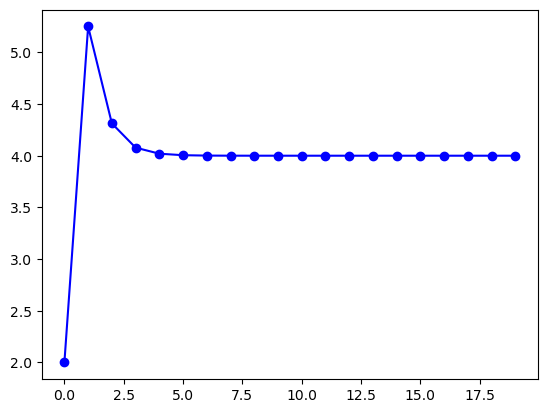

In [16]:
a = 8
b = 1
c = 2
d = 0.5
alpha = 0.5
p0 = [2, 1]

x = solve_discrete(web_exp_model(a,b,c,d, alpha), p0, 20)
plt.plot(x[:,0], 'bo-')

  0%|          | 0/10201 [00:00<?, ?it/s]

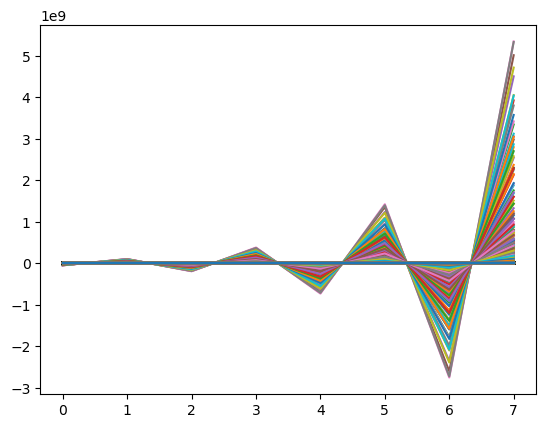

In [59]:
import itertools
from tqdm.notebook import tqdm

alpha_space = np.linspace(0, 1, 101)
d_space = np.linspace(0.5, 2, 101)

x0 = [2, 1]
grid = np.zeros((101, 101))

with tqdm(total=101*101) as pbar:
    for i, alpha in enumerate(alpha_space):
        for j, d in enumerate(d_space):
            x = solve_discrete(web_exp_model(a, b, c, d, alpha), x0, 40)
            prev = x[-10:-1,0]
            last = x[-1,0]

            diff = np.abs(prev-last)
            diffp = np.diff(diff)
            plt.plot(diffp)

            grid[i,j] = diffp.mean()
            pbar.update()


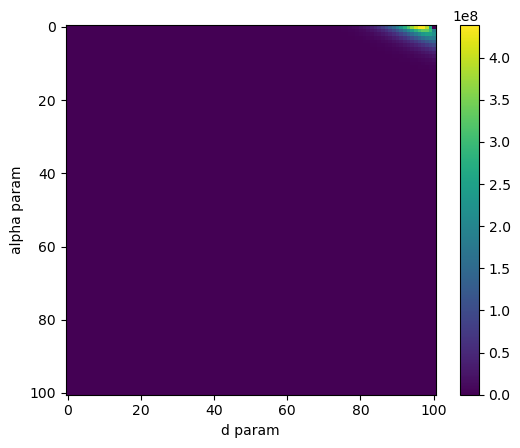

In [56]:
plt.imshow(grid)
plt.colorbar()
plt.xlabel("d param")
plt.ylabel("alpha param")
plt.show()

### Ejercicio 3

El **modelo de Leslie** representa la evolución de una población animal a partir de la población y distribución de las hembras por edades en cada instante de tiempo. Por simplicidad, presentamos el caso de tres grupos de edad. Las suposiciones del modelo son las siguientes: 

- Cada hembra perteneciente al grupo $i$ tiene exactamente $b_i \geq 0$ descendientes hembras en cada periodo de tiempo, con $i=\{1,2,3\}$.
- También en cada periodo de tiempo sobrevive un porcentaje $0 \leq c_i \leq 1$ de hembras pertenecientes el grupo $i$, que pasan al siguiente grupo, con $i=\{1,2,3\}$. Se toma $c_3=0$.
- La matriz
$$L=\left[ \begin{array}{lll} b_1 & b_2 & b_3 \\ c_1 &  0 &  0\\ 0 & c_2 & 0 \end{array}\right]$$
representa la matriz de reproducibilidad de las hembras en la población y se denomina **matriz de Leslie**. Entonces, dada una población de hembras en el tiempo $t$ de $x_t=[x_t^1,x_t^2,x_t^3]$, la población de hembras en el periodo siguiente sigue la ecuación:
$$x_{t+1}= Lx_t$$


**a)** Asúmase una población de insectos con la siguiente matriz de Leslie:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.3 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
Dada una población inicial de hembras de $x_0=[1000,2000,3000]$, calcular la población y distribución (porcentaje) por edades de hembras a medio plazo $t \simeq 20$ y a largo plazo $t \simeq 50$. ¿Tiende a extinguirse la población? Cambiar la población inicial de hembras y observar si la población tenderá a extinguirse o no para alguno de los valores y la distribución final de hembras.

**b)** Repítase el mismo ejercicio anterior con la siguiente matriz de reproducibilidad de las hembras:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.2 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
De nuevo estudiar si la población tiende a extinguirse para distingos valores de población inicial de hembras.

**c)** En las condiciones del apartado a) se lleva a cabo un programa de control de la población de insectos a través de una reducción simultánea de hembras a una tasa $0 \leq d \leq 1$ dada, homogénea para todos los grupos de edad. Encontrar la tasa $d$ con la que la población de insectos permanece estable a largo plazo.  

In [91]:
def solve_discrete2(model, x0, l):
    x = np.zeros((l, len(x0)))
    x[0] = x0
    for t in range(l-1):
        x[t+1] = model(x[t], t)
    return x

In [87]:
def leslie_model(mat):
    def f(x, t):
        return mat@x
    return f

In [88]:
L = np.array([
    [0, 3, 1],
    [0.3, 0, 0],
    [0, 0.5, 0],
])
L

array([[0. , 3. , 1. ],
       [0.3, 0. , 0. ],
       [0. , 0.5, 0. ]])

In [89]:
x0 = np.array([1000, 2000, 3000])

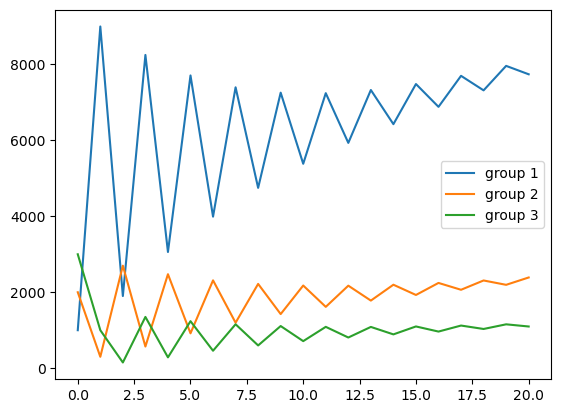

In [92]:
x = solve_discrete2(leslie_model(L), x0, 21)

plt.plot(x, label=["group 1", "group 2", "group 3"])
plt.legend()

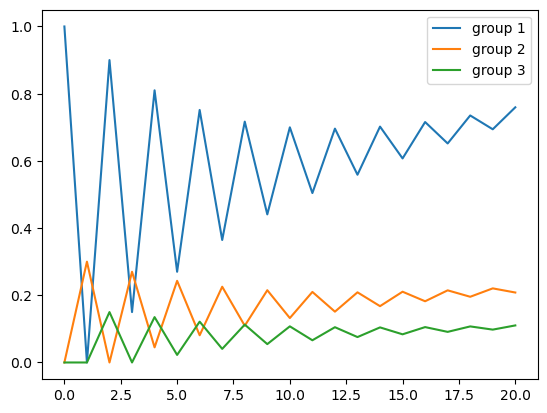

In [94]:
x = solve_discrete2(leslie_model(L), [1,0,0], 21)

plt.plot(x, label=["group 1", "group 2", "group 3"])
plt.legend()

<BarContainer object of 3 artists>

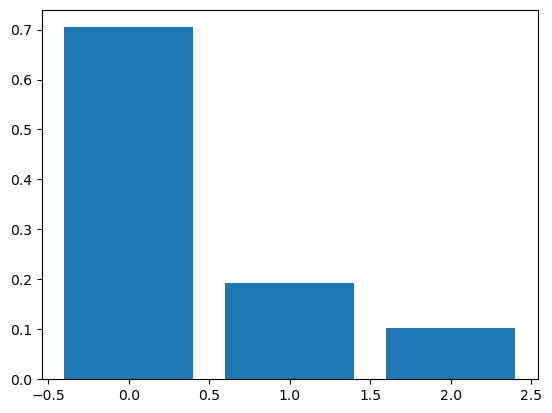

In [95]:
end = x[-1]
prop = end / end.sum()
plt.bar([0, 1, 2], prop, )

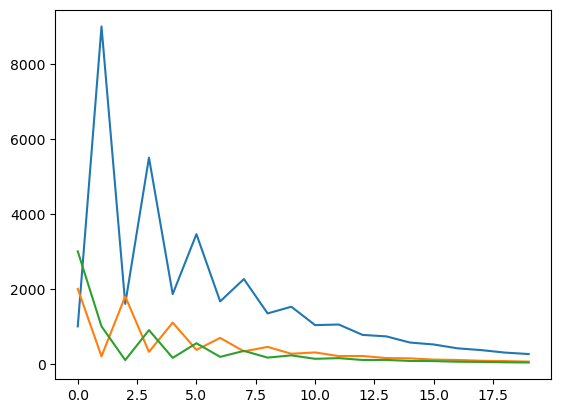

In [105]:
L2 = np.array([
    [0, 3, 1],
    [0.2, 0, 0],
    [0, 0.5, 0],
])

x = solve_discrete2(leslie_model(L2), x0, 20)

plt.plot(x)
plt.show()

In [103]:
dL, VL = np.linalg.eig(L)

fem_prop=VL[:,0]/np.sum(VL[:,0])
fem_prop

array([0.69610709, 0.20412799, 0.09976491])

In [104]:
dl2, VL2 = np.linalg.eig(L2)

fem_prop2 = VL2[:,0] / np.sum(VL2[:,0])

print(dl2[0])
fem_prop2

0.8473570695396923


array([0.72711353, 0.17161916, 0.10126732])

In [107]:
def leslie_control_model(mat, d):
    def f(x, t):
        return mat@x * (1-d)
    return f

In [123]:
from scipy.optimize import leastsq

def err_func(param):
    x = solve_discrete2(leslie_control_model(L, param[0]), x0, 100)

    return x[-10] - x[-1]

leastsq(err_func, [0.02], maxfev=50000)

(array([0.02252592]), 2)

In [113]:
v, _ = np.linalg.eig(L)
v[0]

np.float64(1.0230450202557826)

In [119]:
b = 1/v[0]

In [120]:
1 - b

np.float64(0.022525910198967436)